In [ ]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
def r_nodes(n):
  num = 0
  for i in range(1, n+1):
    num += 2**i
  return(num)  

def r_distance(i):
  if i == 2:
    n = 1
  else:
    n = 2 * math.log2(i+2) - 4
  return n

def r_num_edges(i):
  n = 2 * i - 2
  return(n)

def edges_full(i):
  n = i * ( i - 1 ) / 2
  return(n)

def r_wire_length(i):
  n = 3 * i - 4
  return(n)

def wire_length(i):
  n = 3 * i - 4
  return(n)

def r_degree(m):
  n = []
  for i in range(len(m)):
    if i == 0:
      n.append(2)
    elif i == 1:
      n.append(10/3)
    else:
      j = m[0] * 4 + (m[i-1] - m[0]) * 5 + (m[i] - m[i-1]) * 3
      n.append(j/m[i])
  return(n)

In [ ]:
r_node = []
for i in range(4, 13):
  r_node.append(r_nodes(i))

r_diametr = []
for i in range(len(r_node)):
  r_diametr.append(int(r_distance(r_node[i])))

r_edges = []
for i in range(len(r_node)):
  r_edges.append(r_num_edges(r_node[i]))

r_average = []
for i in range(len(r_node)):
  n = r_wire_length(r_node[i])
  r_average.append(n/r_edges[i])

r_dencity = []
for i in range(len(r_node)):
  n = edges_full(r_node[i])
  r_dencity.append(r_edges[i]/n)

r_valenсy = []
r_valenсy = r_degree(r_node)

In [ ]:
ricobit = pd.DataFrame(list(zip(r_node, r_edges, r_average, r_diametr, r_dencity, r_valenсy)),
               columns =['Number of nodes', 'Number of edges', 'Average distance', 'Diametr', 'Dencity', 'Nodes degree'])

In [ ]:
hafizur0 = pd.read_csv('hafizur0.csv')
hafizur_paley0 = pd.read_csv('hafizur_paley0.csv')

In [ ]:
def cignature (a):
  c = []
  d = 1
  for i in range(1, a):
    ba = i ** 2
    ca = ba % a
    if d > len(c):
      for i in range(d):
        c.append(ca)
    else:
      if a - ca not in(c):
        c.append(ca)
    c = list(set(c))
    ', '.join(map(str, c))
  return(c)

In [ ]:
arr2=hafizur0.transpose().to_numpy()

cign2 = []
for i in range(len(arr2[6])):
  cign2.append(cignature(int(arr2[6][i])))

In [ ]:
arr3=hafizur_paley0.transpose().to_numpy()
cign3 = []
for i in range(len(arr2[6])):
  cign3.append(cignature(int(arr2[6][i])))

In [ ]:
hafizur0['Cignature'] = cign2
hafizur_paley0['Cignature'] = cign3

In [ ]:
hafizur_paley0.to_excel('SCCN_0.xlsx')
hafizur0.to_excel('SCCN_2.xlsx')

In [ ]:
hafizur_paley0

,avg len,diameter,nodes,edges,density,degree,i,Cignature
0,6.639149,13,128,192,0.023622,3,2,[1]
1,7.688264,15,192,320,0.017452,4,3,[1]
2,9.903468,20,320,448,0.008777,3,5,[1]
3,8.835730,17,448,1472,0.014701,7,7,"[1, 2, 4]"
4,7.749119,13,704,3648,0.014742,11,11,"[1, 3, 4, 5, 9]"
5,10.392724,21,832,2624,0.007590,7,13,"[1, 3, 4]"
6,11.108689,22,1088,4480,0.007576,9,17,"[1, 2, 4, 9]"
7,8.661473,17,1216,11072,0.014988,19,19,"[1, 4, 5, 6, 7, 9, 11, 16, 17]"
8,8.683684,17,1472,16320,0.015074,23,23,"[1, 2, 3, 4, 6, 8, 9, 12, 13, 16, 18]"
9,10.608180,21,1856,13120,0.007622,15,29,"[1, 4, 5, 6, 7, 9, 16]"


In [ ]:
hafizur0

,avg len,diameter,nodes,edges,density,degree,i,Cignature
0,4.021277,7,48,133,0.117908,6,2,[1]
1,4.577465,7,72,201,0.078638,6,3,[1]
2,5.823529,9,120,335,0.046919,6,5,[1]
3,5.094597,7,168,483,0.034431,6,7,"[1, 2, 4]"
4,5.189538,7,264,781,0.022497,6,11,"[1, 3, 4, 5, 9]"
5,6.374619,11,312,897,0.018489,6,13,"[1, 3, 4]"
6,6.261309,11,408,1190,0.014333,6,17,"[1, 2, 4, 9]"
7,5.053075,7,456,1425,0.013736,7,19,"[1, 4, 5, 6, 7, 9, 11, 16, 17]"
8,5.001184,7,552,1771,0.011645,7,23,"[1, 2, 3, 4, 6, 8, 9, 12, 13, 16, 18]"
9,5.915827,10,696,2117,0.008753,7,29,"[1, 4, 5, 6, 7, 9, 16]"


In [ ]:
ricobit

,Number of nodes,Number of edges,Average distance,Diametr,Dencity,Nodes degree
0,30,58,1.482759,6,0.133333,2.000000
1,62,122,1.491803,8,0.064516,3.333333
2,126,250,1.496000,10,0.031746,3.746032
3,254,506,1.498024,12,0.015748,3.874016
4,510,1018,1.499018,14,0.007843,3.937255
5,1022,2042,1.499510,16,0.003914,3.968689
6,2046,4090,1.499756,18,0.001955,3.984360
7,4094,8186,1.499878,20,0.000977,3.992184
8,8190,16378,1.499939,22,0.000488,3.996093


In [ ]:
arr1=ricobit.transpose().to_numpy()
arr2=hafizur0.transpose().to_numpy()
arr3=hafizur_paley0.transpose().to_numpy()

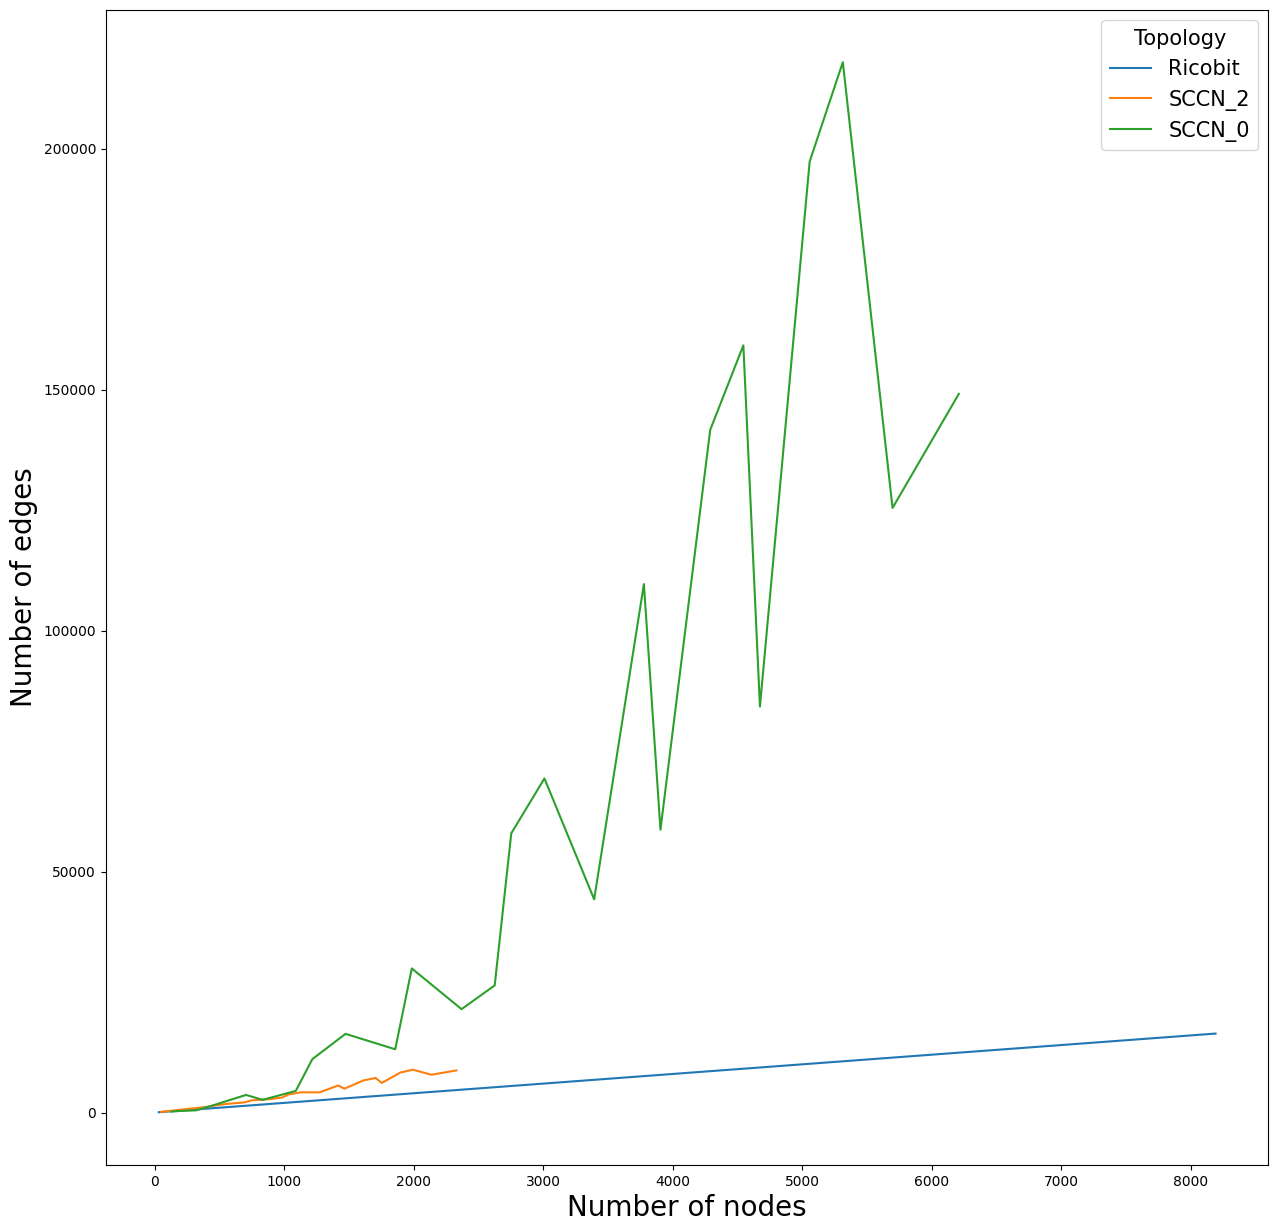

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(arr1[0], arr1[1], label='Ricobit')
plt.plot(arr2[2], arr2[3], label='SCCN_2')
plt.plot(arr3[2], arr3[3], label='SCCN_0')
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Number of edges', fontsize=20)
plt.legend(prop={'size': 15}, title = 'Topology', title_fontsize = '15')

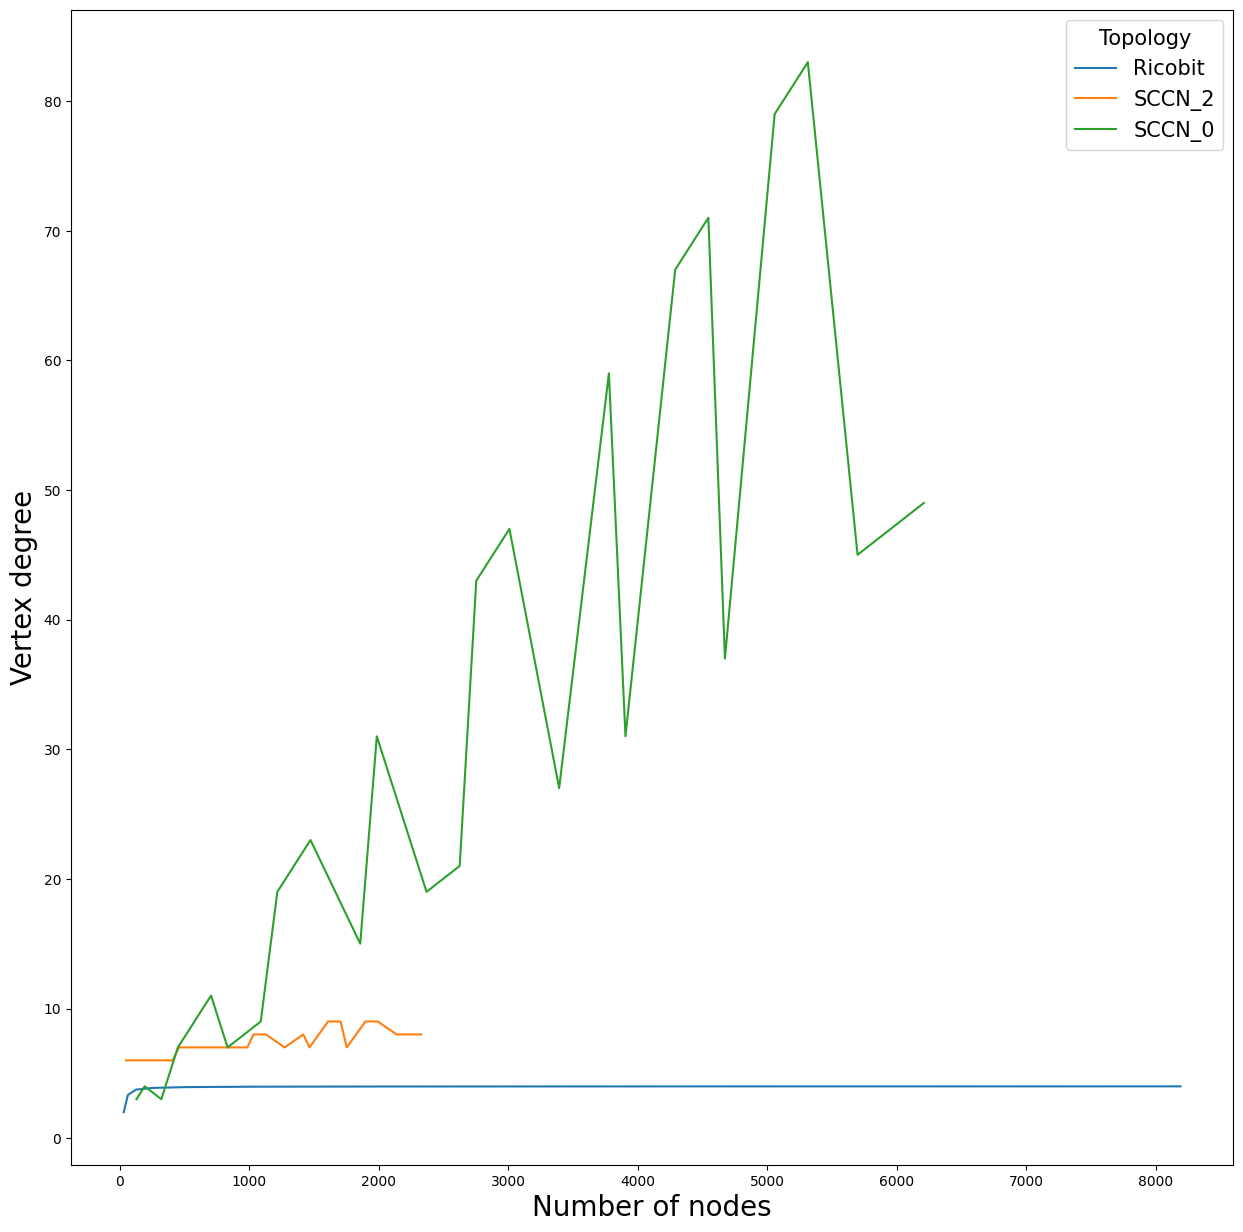

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(arr1[0], arr1[5], label='Ricobit')
plt.plot(arr2[2], arr2[5], label='SCCN_2')
plt.plot(arr3[2], arr3[5], label='SCCN_0')
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Vertex degree', fontsize=20)
plt.legend(prop={'size': 15}, title = 'Topology', title_fontsize = '15')

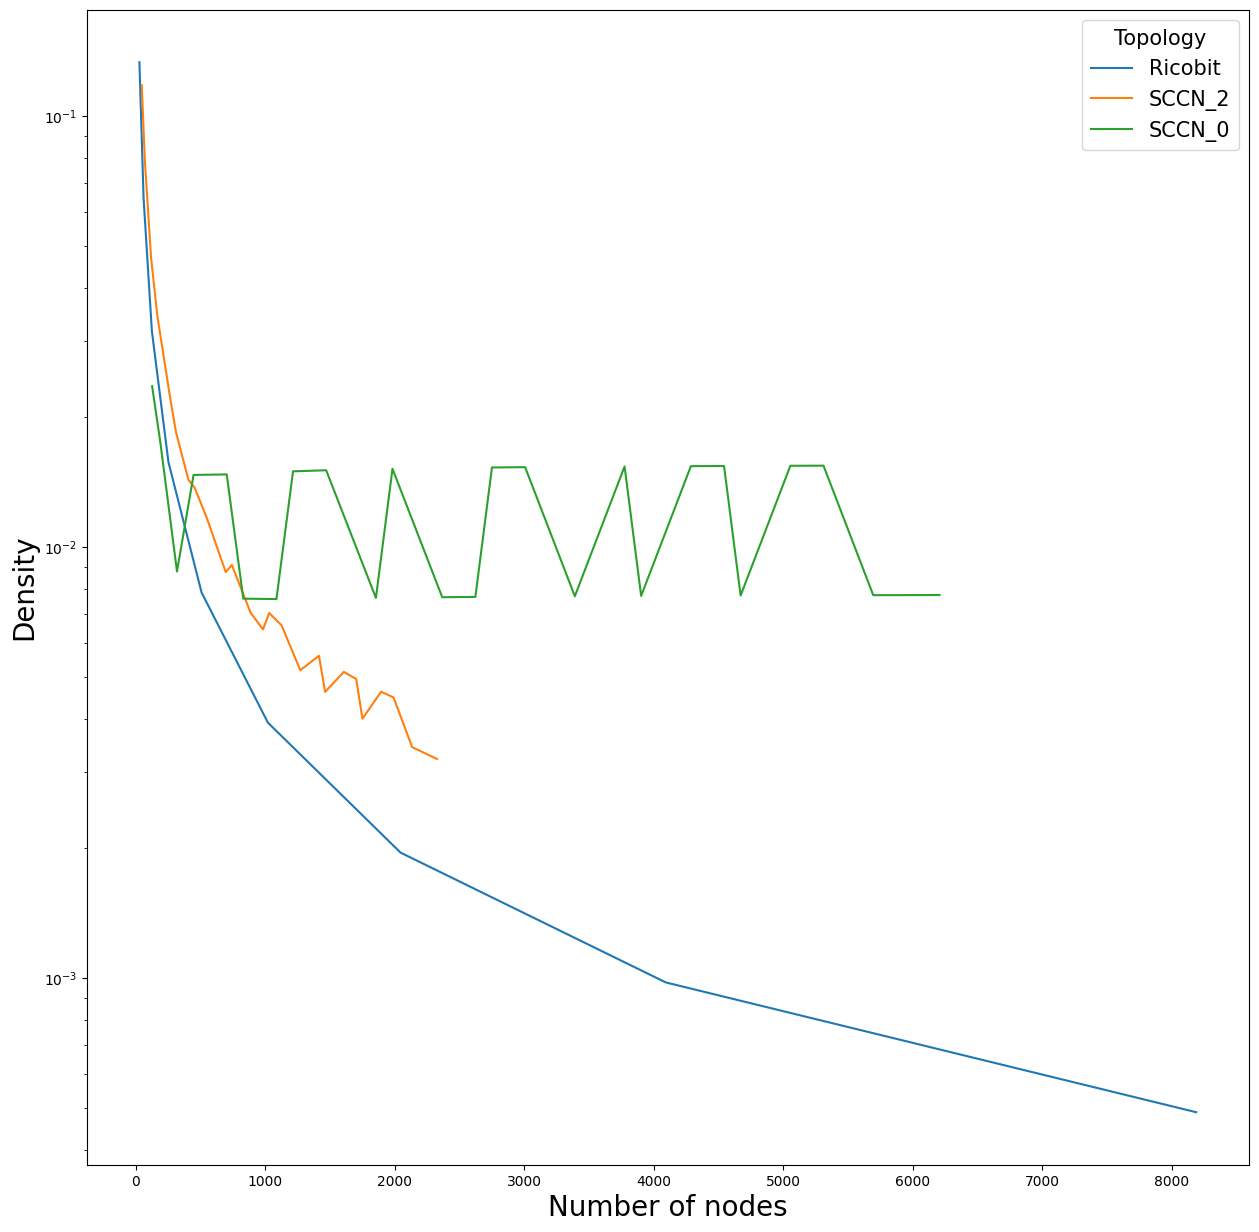

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(arr1[0], arr1[4], label='Ricobit')
plt.plot(arr2[2], arr2[4], label='SCCN_2')
plt.plot(arr3[2], arr3[4], label='SCCN_0')
ax.set_yscale('log')
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(prop={'size': 15}, title = 'Topology', title_fontsize = '15')

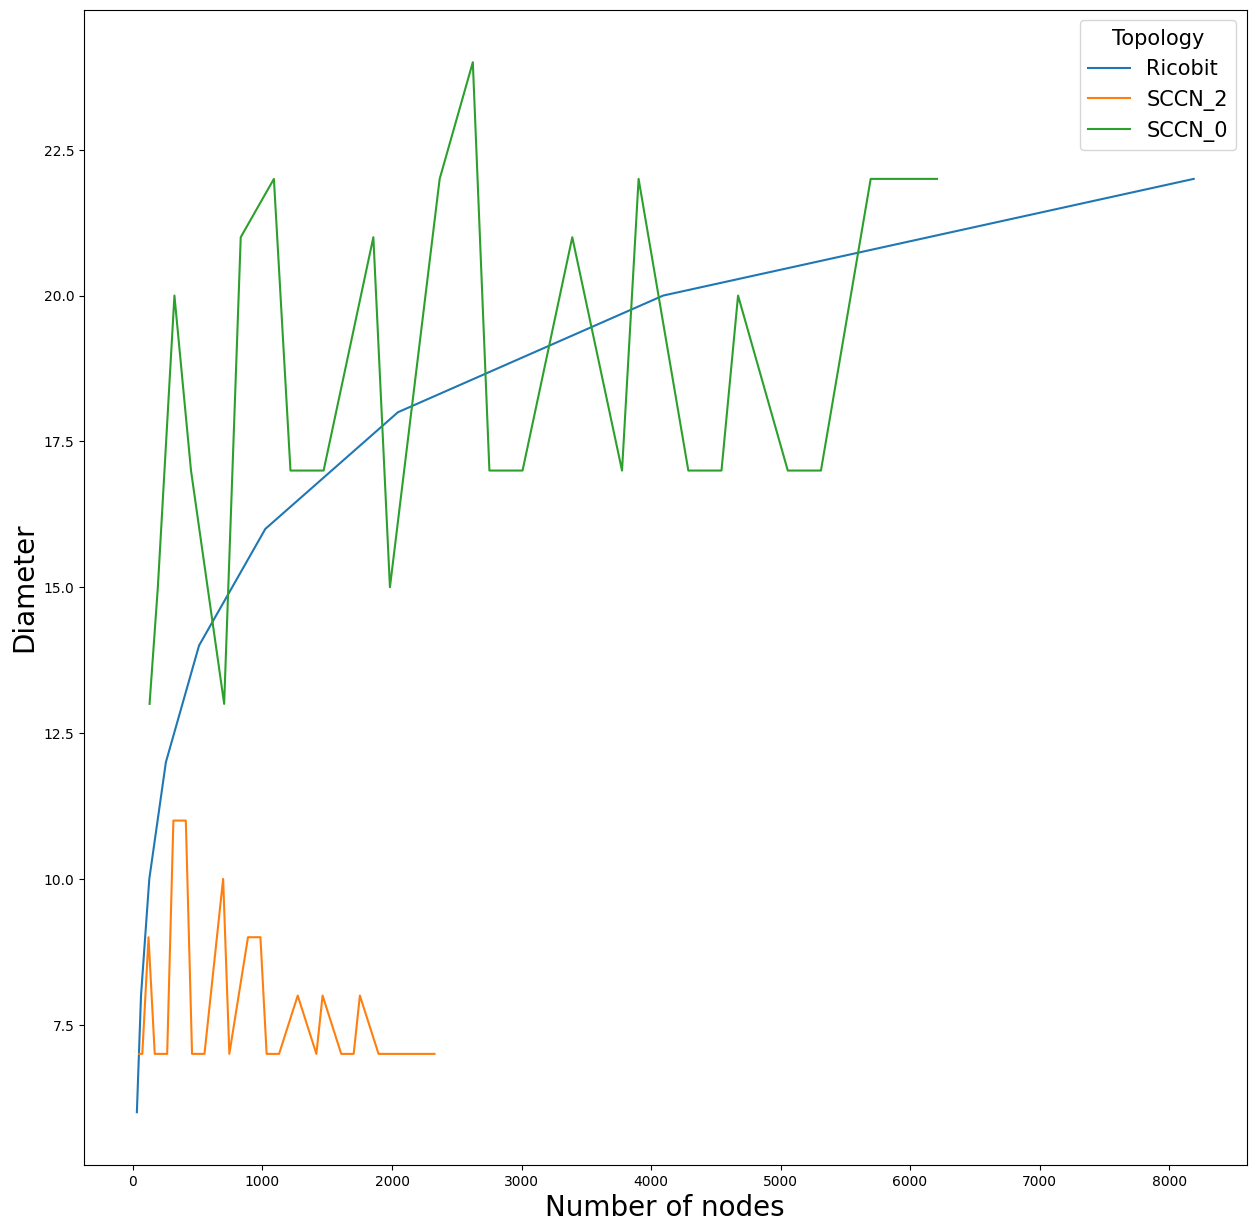

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(arr1[0], arr1[3], label='Ricobit')
plt.plot(arr2[2], arr2[1], label='SCCN_2')
plt.plot(arr3[2], arr3[1], label='SCCN_0')
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Diameter', fontsize=20)
plt.legend(prop={'size': 15}, title = 'Topology', title_fontsize = '15')

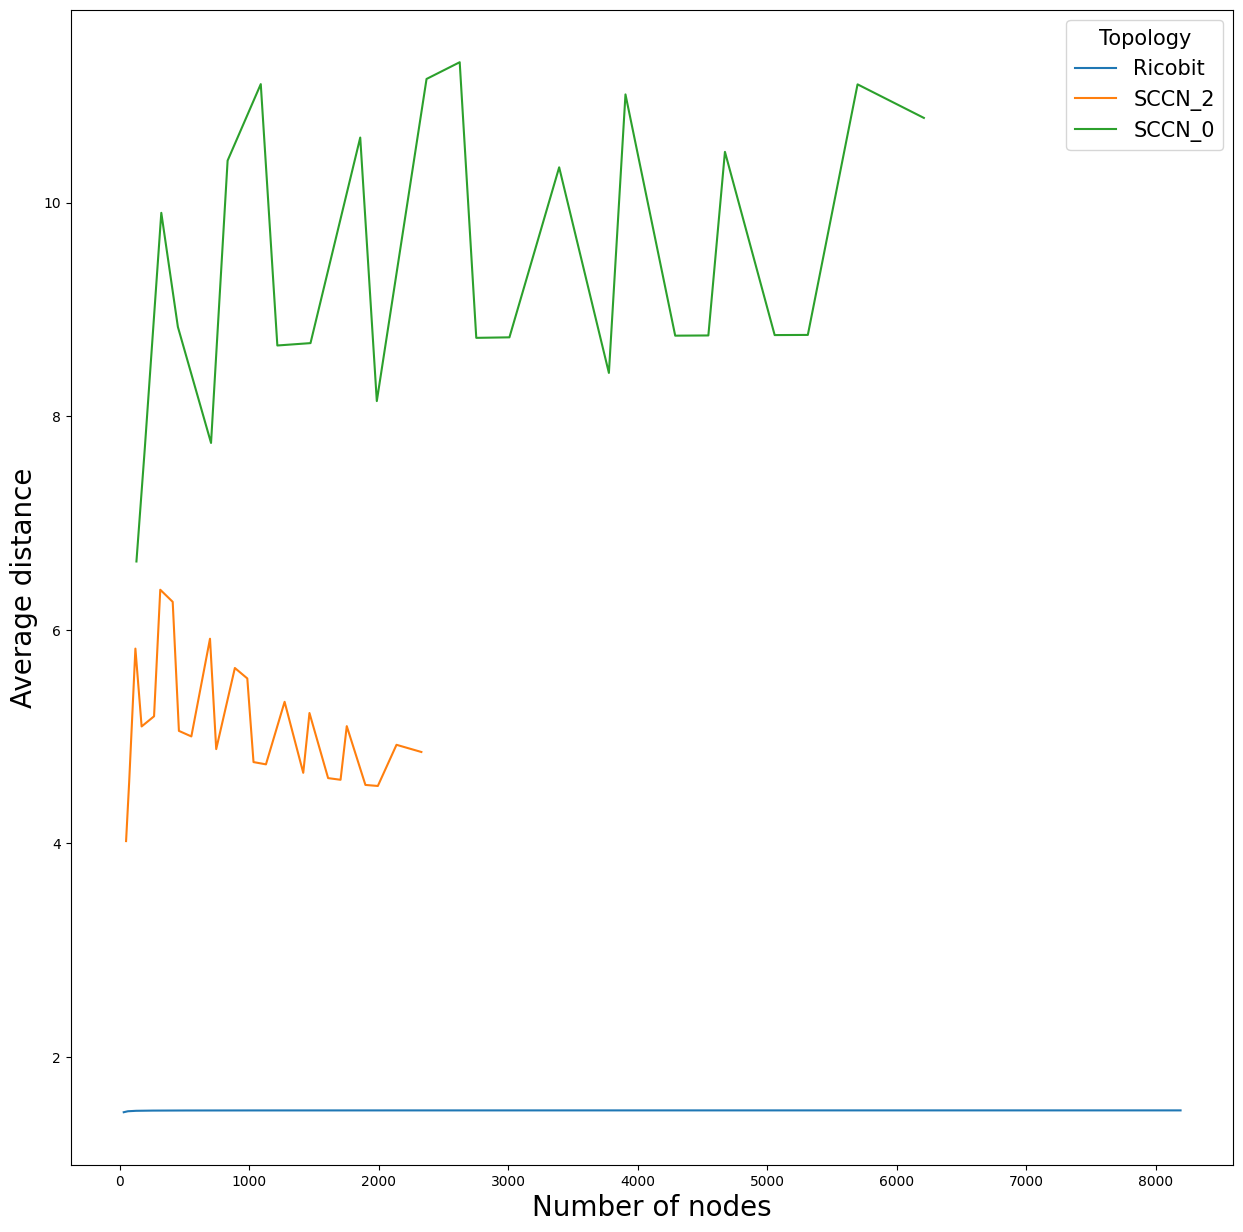

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(arr1[0], arr1[2], label='Ricobit')
plt.plot(arr2[2], arr2[0], label='SCCN_2')
plt.plot(arr3[2], arr3[0], label='SCCN_0')
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Average distance', fontsize=20)
plt.legend(prop={'size': 15}, title = 'Topology', title_fontsize = '15')